<a href="https://colab.research.google.com/github/amul-dhungel/Tensorflow_ChickenSoup/blob/main/Neural_Network_of_Multi_label_classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, its known as multi-class classification.

* This means if you have 3 different classes, its multi-class classification.
* It also means if you have 100 different classes, its multi-class classification.

To practive multi-class classification, we're going to build a neural network to classify images of different items

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been stored into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [41]:
# Show the first training examples
print(f"Training sample: \n{train_data[0]}")
print(f"Training sample: \n{train_labels[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [42]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

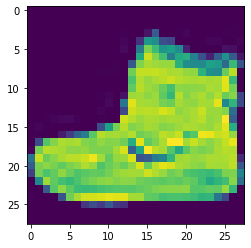

In [43]:
# Plot a single image sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

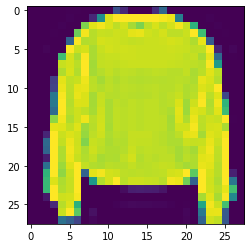

In [44]:
# Plot a single image sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [45]:
# Check out the sample labesl
# For that to be human readable create small list classifying the name of each numercial value

class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

Text(0.5, 1.0, 'T-shirt/top')

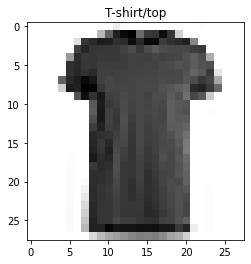

In [46]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

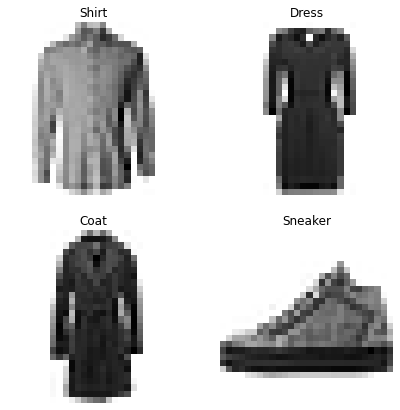

In [47]:
# Plot multiple random images of fashion MNIST
# Viewing random images in grid form 
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)  # defines the grid rows and columns and index.
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)  # Plots axis on each of the data. Try to replace it with "True"

## Building a multi-class classification model

For our multi-calss classfication model, we can use a similar architecture to our binary classifiers, however, we are going to have to tweak a few things:
* Input shape = 28 * 28 ( the shape of one image).
* Output shape = 10 (one per class of clothing).
* Loss function = tf.kears.losses.SparseCategoricalCrossentropy(), to use CategoricalCrossentropy(), we have to convert it into one hot encoding labels.
* Output layer activation = Softmax (not sigmoid)


In [48]:
# It flattens the square matrix into one row matrix
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [49]:
28 * 28

784

In [50]:
x = [1,2,3,4,5,5,6,7,0,9]
tf.one_hot(x,depth=10) # depth parameters indicates the number of columns

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [51]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation = "relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

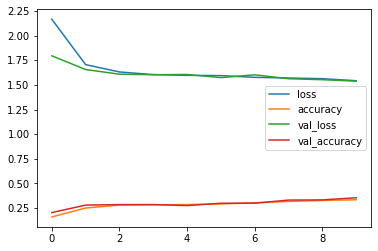

In [52]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot()

In [53]:
# Check the model summary
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


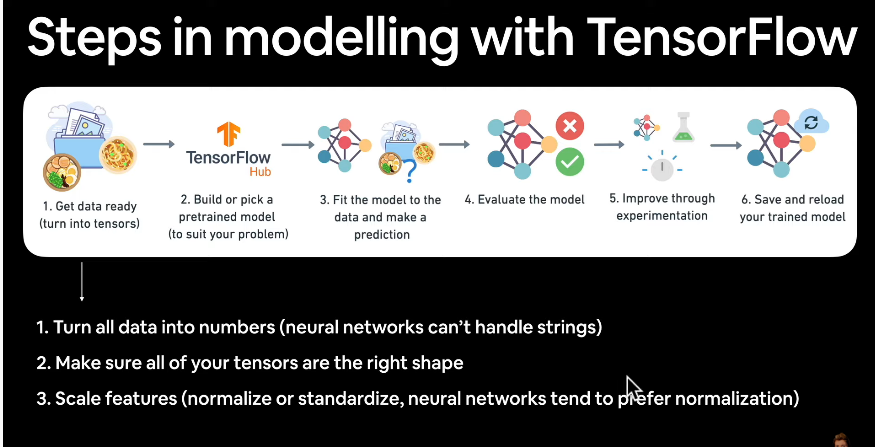

In [54]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensor between (0 & 1)

In [55]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum

train_data_norm = train_data / 255
test_data_norm = test_data / 255

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation = "relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

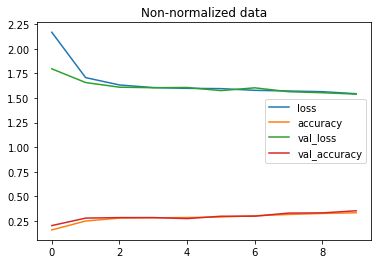

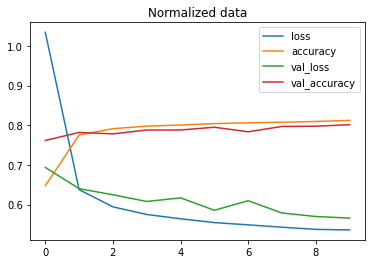

In [57]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized data")
pd.DataFrame(norm_history.history).plot(title = "Normalized data")

**Note:** Neural networks tend to perfer data in numercial form as well as scaled/normalized (numbers between 0 & 1)

## Finding the ideal learning rate

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation = "relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

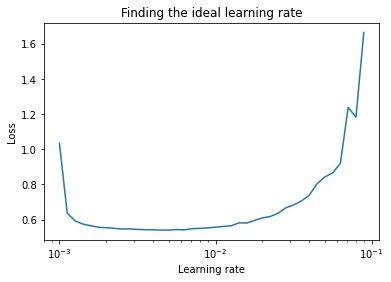

In [59]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

Here in the above graph, the lowest point of loss based on learning rate (X-axis) is little greater than 10^-3. So move little backward means left to the lowest point of graph, and take the value of Learning rate that is 0.001

In [63]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,activation = "relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# Fit the model
history_4 = model_4.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm,test_labels),
                               callbacks = [lr_scheduler])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

# Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualization).
* Improve its results (by training it for longer or changing the architecutre).
* Save and export it for use in an application

Let's go through the top 2...

## Creating a confusion matrix

In [22]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size = 15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fix, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blue)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    lables = classes
  else:
    lables = np.arrange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arrange(n_classes),
         yticks=np.arrange(n_classes),
         xticklabels=lables,
         yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}% )",
             horizontalalignment="center",
             color="white" if cm[i , j] > threshold else "black",
             size=text_size)

In [61]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [62]:
# Make some predicitions with our model
y_probs = model_4.predict(test_data_norm) # probs is short for prediciton probability

# View the first 5 predictions
y_probs[:5]

array([[0.09914527, 0.06800114, 0.11476241, 0.09788869, 0.11275674,
        0.14220819, 0.0915136 , 0.08822628, 0.08891144, 0.09658629],
       [0.11126908, 0.07169051, 0.1182073 , 0.08425511, 0.11253278,
        0.12375221, 0.10213123, 0.09284908, 0.08048395, 0.10282876],
       [0.11499258, 0.04025178, 0.13751334, 0.07123431, 0.13127844,
        0.15711884, 0.09299521, 0.08857863, 0.06023011, 0.10580683],
       [0.11272658, 0.06842127, 0.12150287, 0.08150938, 0.11369126,
        0.1274141 , 0.10306036, 0.09135903, 0.07771689, 0.10259831],
       [0.09929445, 0.09667454, 0.09958564, 0.10207151, 0.10173632,
        0.10245267, 0.09734373, 0.10015466, 0.10019623, 0.10049027]],
      dtype=float32)

In [39]:
tf.argmax(y_probs[0]), y_probs[0], class_name[tf.argmax(y_probs[9])]

(<tf.Tensor: shape=(), dtype=int64, numpy=5>,
 array([0.09914527, 0.06800114, 0.11476241, 0.09788869, 0.11275674,
        0.14220819, 0.0915136 , 0.08822628, 0.08891144, 0.09658629],
       dtype=float32),
 'Sandal')

In [35]:
# Convert all of the predicition prbabilites into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])